# Emotional anaysis of tweets (Subset)

In [2]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import transformers
import torch
import seaborn as sns

In [3]:
#df = pd.read_csv('/notebooks/evanc/KoReCOVID/resources/Pol5_Clean.csv').sample(5000)
#Changed this so that this analysis can be reran on pre-labeled text so models don't have to run multipul times
df = pd.read_csv('/notebooks/evanc/KoReCOVID/resources/Pol5_Clean_Sample_Scores.csv')

In [4]:
df.head()

,Unnamed: 0,time,id,text,user,uid,mention_username,mention_id,mention_realname,url,...,user_verified,lang,rtb,mentioncheck,replycheck,month,week,Emotions,Bert_Scents,VADER_Scents
0,138500,2020-05-21 18:51:56+00:00,1263543063789604865,@GovernorVA That's bad news for the county. As...,BurlBud,983180176434573312,GovernorVA,104198706,Ralph Northam,https://t.co/oqlQEOjts5,...,False,en,True,True,True,5,21,"[[{'label': 'sadness', 'score': 0.009249932132...","[[{'label': 'NEG', 'score': 0.9852299094200134...","{'neg': 0.332, 'neu': 0.668, 'pos': 0.0, 'comp..."
1,216243,2020-05-24 20:42:57+00:00,1264658166622666754,@realDonaldTrump You are a moron. Deaths have ...,Snicky01,33177764,realDonaldTrump,25073877,Donald J. Trump,https://t.co/Ye32Jbb6ZB,...,False,en,True,True,True,5,21,"[[{'label': 'sadness', 'score': 0.133566543459...","[[{'label': 'NEG', 'score': 0.9851841926574707...","{'neg': 0.093, 'neu': 0.754, 'pos': 0.153, 'co..."
2,238039,2020-05-25 20:31:31+00:00,1265017675740180480,"@realDonaldTrump Let me fix that for you, Mr. ...",KevinG05202433,1173609415594799110,realDonaldTrump,25073877,Donald J. Trump,https://t.co/isx9zPPDVV,...,False,en,True,True,True,5,22,"[[{'label': 'sadness', 'score': 0.214517220854...","[[{'label': 'NEG', 'score': 0.9690086245536804...","{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp..."
3,215360,2020-05-24 19:20:21+00:00,1264637378603487235,@SylvesterTurner The @HoustonFire can but they...,LTLFreightRates,233632357,SylvesterTurner HoustonFire houmayor,115105973 88957094 1099080229111369728,Sylvester Turner Houston Fire Dept Houston May...,NaN,...,False,en,True,True,True,5,21,"[[{'label': 'sadness', 'score': 0.010946567170...","[[{'label': 'NEG', 'score': 0.5163222551345825...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,81867,2020-05-18 23:11:34+00:00,1262521237273808896,@Ilhan #Hydroxychloroquine is already availabl...,EarlyJohn3,1043980174587514880,Ilhan,1082334352711790593,Rep. Ilhan Omar,https://t.co/HMVe7PTjOF,...,False,en,True,True,True,5,21,"[[{'label': 'sadness', 'score': 0.109045490622...","[[{'label': 'NEG', 'score': 0.0053077568300068...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [5]:
df.shape

(5000, 34)

In [6]:
df = df.drop('Unnamed: 0', axis=1)

In [7]:
#!!!!!!SKIP IF DO NOT WANT TO RE-RUN ANALYSIS!!!!!!
#from transformers import pipeline

# First we will classify based on specific emotions
#classifier = pipeline('text-classification', model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores=True)

#df['Emotions'] = df['text'].apply(lambda tweet: classifier(tweet))

In [8]:
#!!!!!!SKIP IF DO NOT WANT TO RE-RUN ANALYSIS!!!!!!
#Now we are going to find sentiments with bertweet
#SentClassify = pipeline('text-classification', model='finiteautomata/bertweet-base-sentiment-analysis', return_all_scores=True)

#This may be less accurate as this is truncated to the old twitter length
#df['Bert_Scents'] = df['text'].apply(lambda tweet: SentClassify(tweet[:127]))

In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [10]:
df['VADER_Scents'] = df['text'].apply(lambda tweet: sid.polarity_scores(tweet))

In [ ]:
#df.to_csv('/notebooks/evanc/KoReCOVID/resources/Pol5_Clean_Sample_Scores.csv')

In [11]:
df = df.reset_index()

In [12]:
df_sentiments = df[['id','Emotions','Bert_Scents','VADER_Scents']]

In [13]:
#Now that have sentiments for each tweet I am going to try to standardize this data and merge it back into the main dataframe
#This is so that I can do visualizations with relative ease
df_sentiments

,id,Emotions,Bert_Scents,VADER_Scents
0,1263543063789604865,"[[{'label': 'sadness', 'score': 0.009249932132...","[[{'label': 'NEG', 'score': 0.9852299094200134...","{'neg': 0.332, 'neu': 0.668, 'pos': 0.0, 'comp..."
1,1264658166622666754,"[[{'label': 'sadness', 'score': 0.133566543459...","[[{'label': 'NEG', 'score': 0.9851841926574707...","{'neg': 0.09, 'neu': 0.761, 'pos': 0.149, 'com..."
2,1265017675740180480,"[[{'label': 'sadness', 'score': 0.214517220854...","[[{'label': 'NEG', 'score': 0.9690086245536804...","{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp..."
3,1264637378603487235,"[[{'label': 'sadness', 'score': 0.010946567170...","[[{'label': 'NEG', 'score': 0.5163222551345825...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,1262521237273808896,"[[{'label': 'sadness', 'score': 0.109045490622...","[[{'label': 'NEG', 'score': 0.0053077568300068...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
...,...,...,...,...
4995,1264522060585414657,"[[{'label': 'sadness', 'score': 0.000783213414...","[[{'label': 'NEG', 'score': 0.9687660336494446...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4996,1263121943294668801,"[[{'label': 'sadness', 'score': 0.006558735389...","[[{'label': 'NEG', 'score': 0.9164227843284607...","{'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'comp..."
4997,1261257300133777410,"[[{'label': 'sadness', 'score': 0.179566055536...","[[{'label': 'NEG', 'score': 0.9781259894371033...","{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp..."
4998,1264702588198453249,"[[{'label': 'sadness', 'score': 0.041994303464...","[[{'label': 'NEG', 'score': 0.7488328218460083...","{'neg': 0.087, 'neu': 0.913, 'pos': 0.0, 'comp..."


In [14]:
#First we are going to deal with the emotions since I'm not a huge fan of it's current format
df_sentiments['Emotions'][0] #Here I take a look at the data structure and we are going to change it to a simple dicitonary

"[[{'label': 'sadness', 'score': 0.009249932132661343}, {'label': 'joy', 'score': 0.018400995060801506}, {'label': 'love', 'score': 0.0010329013457521796}, {'label': 'anger', 'score': 0.8107765316963196}, {'label': 'fear', 'score': 0.15956367552280426}, {'label': 'surprise', 'score': 0.0009758492233231664}]]"

In [15]:
#  am going to make this data look like this {'emotion':(score)}}

In [16]:
 #!!!!!!SKIP IF DO NOT WANT TO RE-RUN ANALYSIS!!!!!!
#df_sentiments['Emotions'] = df_sentiments['Emotions'].apply(lambda scores: {i['label'] :i['score'] for i in scores[0]})

TypeError: string indices must be integers

In [17]:
#Now that I have the emotions in the right format I will start on the bert sentiment scores
df.Bert_Scents[0]

"[[{'label': 'NEG', 'score': 0.9852299094200134}, {'label': 'NEU', 'score': 0.0099571468308568}, {'label': 'POS', 'score': 0.004812953062355518}]]"

In [18]:
#!!!!!!SKIP IF DO NOT WANT TO RE-RUN ANALYSIS!!!!!!
#df_sentiments['Bert_Scents'] = df_sentiments['Bert_Scents'].apply(lambda scores: {i['label'] :i['score'] for i in scores[0]})

TypeError: string indices must be integers

In [19]:
#!!!!!!SKIP IF DO NOT WANT TO RE-RUN ANALYSIS!!!!!!
#df_sentiments['Bert_Scents'] = df_sentiments['Bert_Scents'].apply(lambda sents: {k.lower():v for k,v in sents.items()})

AttributeError: 'str' object has no attribute 'items'

In [20]:
#Now let's check the formatting of everything
df_sentiments.head()

,id,Emotions,Bert_Scents,VADER_Scents
0,1263543063789604865,"[[{'label': 'sadness', 'score': 0.009249932132...","[[{'label': 'NEG', 'score': 0.9852299094200134...","{'neg': 0.332, 'neu': 0.668, 'pos': 0.0, 'comp..."
1,1264658166622666754,"[[{'label': 'sadness', 'score': 0.133566543459...","[[{'label': 'NEG', 'score': 0.9851841926574707...","{'neg': 0.09, 'neu': 0.761, 'pos': 0.149, 'com..."
2,1265017675740180480,"[[{'label': 'sadness', 'score': 0.214517220854...","[[{'label': 'NEG', 'score': 0.9690086245536804...","{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp..."
3,1264637378603487235,"[[{'label': 'sadness', 'score': 0.010946567170...","[[{'label': 'NEG', 'score': 0.5163222551345825...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,1262521237273808896,"[[{'label': 'sadness', 'score': 0.109045490622...","[[{'label': 'NEG', 'score': 0.0053077568300068...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [21]:
#Now that everything is reletivly standard I am going to extract a string from each row that best represtents each way of
#detecting emotion

In [22]:
#!!!!!!SKIP IF DO NOT WANT TO RE-RUN ANALYSIS!!!!!!
#df_sentiments['Highest_Emotion'] = df_sentiments['Emotions'].apply(lambda emotions: max(emotions, key=emotions.get))
#df_sentiments['Bert_Scents'] = df_sentiments['Bert_Scents'].apply(lambda scents: max(scents, key=scents.get))

AttributeError: 'str' object has no attribute 'get'

In [23]:
df_sentiments.head()

,id,Emotions,Bert_Scents,VADER_Scents
0,1263543063789604865,"[[{'label': 'sadness', 'score': 0.009249932132...","[[{'label': 'NEG', 'score': 0.9852299094200134...","{'neg': 0.332, 'neu': 0.668, 'pos': 0.0, 'comp..."
1,1264658166622666754,"[[{'label': 'sadness', 'score': 0.133566543459...","[[{'label': 'NEG', 'score': 0.9851841926574707...","{'neg': 0.09, 'neu': 0.761, 'pos': 0.149, 'com..."
2,1265017675740180480,"[[{'label': 'sadness', 'score': 0.214517220854...","[[{'label': 'NEG', 'score': 0.9690086245536804...","{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp..."
3,1264637378603487235,"[[{'label': 'sadness', 'score': 0.010946567170...","[[{'label': 'NEG', 'score': 0.5163222551345825...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,1262521237273808896,"[[{'label': 'sadness', 'score': 0.109045490622...","[[{'label': 'NEG', 'score': 0.0053077568300068...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [24]:
def Classify_Sentiment(score):
    if score >= 0.2:
        return 'pos'
    elif score <= -0.2: 
        return 'neg'
    else:
        return 'neu'

In [25]:
df_sentiments['VADER_Sents_Cat'] = df_sentiments['VADER_Scents'].apply(lambda x: Classify_Sentiment(x['compound']))

/tmp/ipykernel_28953/309123767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiments['VADER_Sents_Cat'] = df_sentiments['VADER_Scents'].apply(lambda x: Classify_Sentiment(x['compound']))


In [30]:
df.columns

Index(['index', 'time', 'id', 'text', 'user', 'uid', 'mention_username',
       'mention_id', 'mention_realname', 'url', 'expanded_url', 'source',
       'in_reply_to_id', 'in_reply_to_uid', 'in_reply_to_username', 'user_loc',
       'user_created_at', 'user_follower_count', 'user_favorite_count',
       'user_friends_count', 'user_status_count', 'user_listed_count',
       'user_description', 'user_geo_enabled', 'user_verified', 'lang', 'rtb',
       'mentioncheck', 'replycheck', 'month', 'week', 'Emotions',
       'Bert_Scents', 'VADER_Scents'],
      dtype='object')

ValueError: Could not interpret input 'Highest_Emotion'

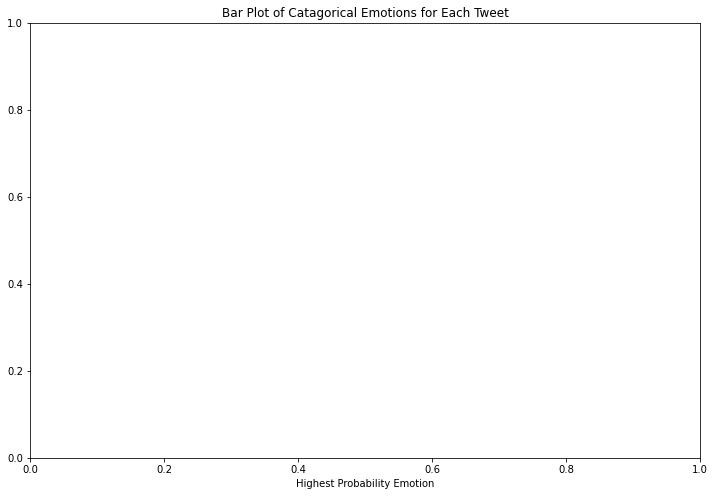

In [28]:
# Now that I have categorical variables for each of these metics I will make some bar charts
# 1) Emotions
plt.figure(figsize=(12,8))
plt.title('Bar Plot of Catagorical Emotions for Each Tweet')
plt.xlabel('Highest Probability Emotion')
sns.countplot(data=df, x='Highest_Emotion',palette='mako')

In [ ]:
# 2) Bert Sentiments
plt.figure(figsize=(12,8))
plt.title('Bar Plot of Catagorical Bert Sentiments for Each Tweet (Shortened)')
sns.countplot(data=df_sentiments, y='Bert_Scents', order=['neu','pos','neg'],palette='mako')

<AxesSubplot:title={'center':'Bar Plot of Catagorical VADER Sentiments for Each Tweet'}, xlabel='count', ylabel='VADER_Sents_Cat'>

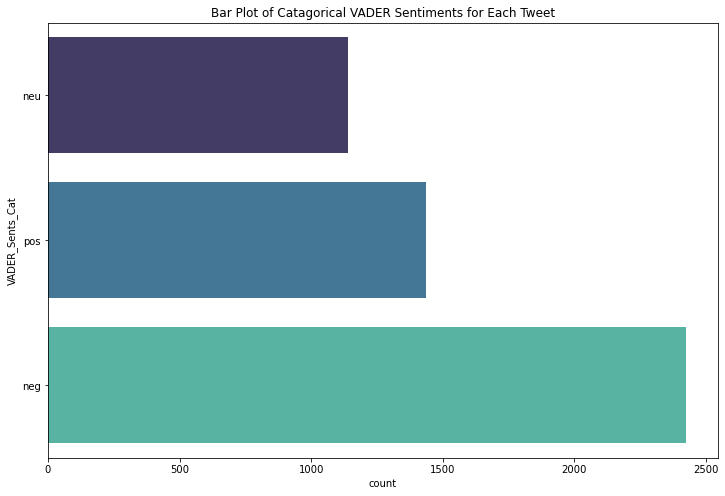

In [31]:
# 2) VADER Sentiments
plt.figure(figsize=(12,8))
plt.title('Bar Plot of Catagorical VADER Sentiments for Each Tweet')
sns.countplot(data=df_sentiments, y='VADER_Sents_Cat', order=['neu','pos','neg'], palette='mako')

In [32]:
df = df.merge(df_sentiments, on='id')

In [33]:
#df.to_csv('/notebooks/evanc/KoReCOVID/resources/SampleWithEmotionsPol5.csv')

In [34]:
df['text'].apply(lambda text: SentClassify.tokenizer.tokenize(text))[1]

NameError: name 'SentClassify' is not defined

In [ ]:
print(SentClassify('I am so angry'))
print(SentClassify('I am so angry!'))
print(SentClassify('I am so angry😡'))

In [ ]:
print(sid.polarity_scores('I am so angry'))
print(sid.polarity_scores('I am so angry!'))
print(sid.polarity_scores('I am so angry😡'))

In [ ]:
df_sentiments['comp'] = df_sentiments.VADER_Scents.apply(lambda x : x['compound'])

In [ ]:
sns.histplot(df_sentiments['comp'])

In [ ]:
df_sentiments['comp'].value_counts()

In [ ]:
df.merge(df_sentiments[df_sentiments['comp'] == 0], on='id')['text'][1]

In [ ]:
sid.polarity_scores('overblown in an attempt to grab power.')